In [1]:
import pandas as pd
import os
from ast import literal_eval
import numpy as np
import nltk
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# import spacy
from gensim.models.word2vec import Word2Vec
# nlp=spacy.load('en_core_web_sm')
import plotly.express as px
# from umap import UMAP
import warnings
import re
warnings.filterwarnings('ignore')
from tqdm import tqdm
from gensim.models.fasttext import FastText

In [2]:
path='/Users/mstudio/Library/CloudStorage/Box-Box/coolie/token/'
df=pd.read_csv(path+'coolie-token-lemma.csv', converters={'state':literal_eval, 'context':literal_eval, 'city':literal_eval, 'sent':literal_eval, 'lemma':literal_eval})

In [3]:
def fast_text(dataframe:pd.DataFrame(), word:str):
  dic={}
  sent=[row for row in dataframe['token']]
  model=FastText(sent, min_count=1, workers=3, window=3, sg=1)
  for i in model.wv.most_similar(word, topn=len(model.wv.index_to_key), restrict_vocab=len(model.wv.index_to_key)):
    dic[i[0]]=i[1]
  sim=pd.DataFrame.from_dict(dic, orient='index')
  sim.reset_index(inplace=True) 
  sim.columns=['token', 'cosine']
  return sim

In [4]:
model=FastText(df['lemma'], min_count=1, workers=3, window=5, sg=1)

In [5]:
pd.DataFrame(model.wv.most_similar('coolie', topn=1000), columns=['token', 'sim']).to_csv(path+'fasttext_token_coolie.csv', index=False)

In [6]:
ocr=pd.read_csv(path+'fasttext_token_coolie.csv')

In [7]:
ocr_dic={}
for ocr in ocr['token'][:200]:
    ocr_dic[ocr]='coolie'

In [8]:
def replace_tokens_with_candidates(tokens):
    replaced_tokens = []
    for token in tokens:
        if token in ocr_dic:
            replaced_tokens.append(ocr_dic[token])
        else:
            replaced_tokens.append(token)
    return replaced_tokens

In [9]:
df['ocr_lemma']=df['lemma'].apply(replace_tokens_with_candidates)

In [10]:
df['state_str']=df['state'].str[0]
df=df[~df['state_str'].isnull()]
df=df[df['state_str']!='Virgin Islands']
df=df[df['state_str']!='Puerto Rico']
df['lemma']=df['lemma'].astype(str)

In [11]:
state_name=[]
coolie_vector=[]
for state in tqdm(df['state_str'].unique()):
    state_name.append(state)
    statedf=df[df['state_str']==state]
    # model=Word2Vec([row for row in statedf['sent_token']])
    model=Word2Vec([row for row in statedf['ocr_lemma']], min_count=1, window=5)
    coolie_vector.append(model.wv.get_mean_vector('coolie'))
    # coolie_vector.append((model.wv.get_mean_vector('coolie')+model.wv.get_mean_vector('coolies'))/2)

100%|██████████| 50/50 [00:05<00:00,  8.61it/s]


In [12]:
df[df['state_str']=='Rhode Island']

,state,city,date,lccn,sent,title,lemma,ocr_lemma,state_str
881,[Rhode Island],[Providence],19051205,sn91070630,"[act, as, we, have, acted, in, the, matter, of...",The Providence news.,"['act', 'act', 'matter', 'restrict', 'coolie',...","[act, act, matter, restrict, coolie, immigrati...",Rhode Island
882,[Rhode Island],[Providence],19051205,sn91070630,"[a, governing, class, aof, rich, planterg, exi...",The Providence news.,"['govern', 'class', 'aof', 'rich', 'planterg',...","[govern, class, aof, rich, planterg, exist, me...",Rhode Island
1003,[Rhode Island],[Providence],19040621,sn91070630,"[as, the, crew, was, ordered, to, leave, the, ...",The Providence news.,"['crew', 'order', 'leave', 'ship', 'coolie', '...","[crew, order, leave, ship, coolie, rush, deck,...",Rhode Island
1004,[Rhode Island],[Providence],19040621,sn91070630,"[as, the, crew, was, ordered, to, leave, the, ...",The Providence news.,"['crew', 'order', 'leave', 'ship', 'coolie', '...","[crew, order, leave, ship, coolie, rush, deck,...",Rhode Island
1005,[Rhode Island],[Providence],19040621,sn91070630,"[sbado, obeyed, the, summons, to, stop, ., fhe...",The Providence news.,"['sbado', 'obeyed', 'summon', 'stop', 'fhe', '...","[sbado, obeyed, summon, stop, fhe, carry, cool...",Rhode Island
...,...,...,...,...,...,...,...,...,...
124887,[Rhode Island],[Providence],18931111,sn92064042,"[., as, soon, as, the, fire, was, burning, wel...",The Olneyville tribune.,"['soon', 'fire', 'burn', 'well', 'coolie', 'cr...","[soon, fire, burn, well, coolie, creep, away, ...",Rhode Island
125176,[Rhode Island],[Providence],19040706,sn91070630,"[dutch, losses, were, a, captaln, ,, 22, soldi...",The Providence news.,"['dutch', 'loss', 'captaln', 'soldier', 'six',...","[dutch, loss, captaln, soldier, six, coolie, w...",Rhode Island
125181,[Rhode Island],[Providence],19011224,sn91070630,"[in, the, heavy, surf, ,, the, victims, were, ...",The Providence news.,"['heavy', 'surf', 'victim', 'chinese', 'coolie...","[heavy, surf, victim, chinese, coolie, two, ch...",Rhode Island
125182,[Rhode Island],[Providence],19011101,sn91070630,"[carts, along, almost, bottomless, roads, ,, b...",The Providence news.,"['cart', 'along', 'almost', 'bottomless', 'roa...","[cart, along, almost, bottomless, road, pack, ...",Rhode Island


In [13]:
df[df['state_str']=='Massachusetts']

,state,city,date,lccn,sent,title,lemma,ocr_lemma,state_str
893,[Massachusetts],[Worcester],18590808,sn83021205,"[considerable, ,, and, several, lives, are, re...",Worcester daily spy. [volume],"['considerable', 'several', 'life', 'report', ...","[considerable, several, life, report, lose, co...",Massachusetts
894,[Massachusetts],[Worcester],18590808,sn83021205,"[interview, with, the, duke, of, newcastle, in...",Worcester daily spy. [volume],"['interview', 'duke', 'newcastle', 'regard', '...","[interview, duke, newcastle, regard, coolie, e...",Massachusetts
972,[Massachusetts],[Boston],19410726,sn83045863,"[patterns, are, available, anywhere, they, sel...",The guardian. [volume],"['pattern', 'available', 'anywhere', 'sell', '...","[pattern, available, anywhere, sell, pat, tern...",Massachusetts
973,[Massachusetts],[Boston],19410726,sn83045863,"[for, they, require, little, or, no, fitting, ...",The guardian. [volume],"['require', 'little', 'fitting', 'coolie', 'sk...","[require, little, fitting, coolie, sketched, l...",Massachusetts
974,[Massachusetts],[Boston],19410726,sn83045863,"[bro, cade, or, metal, cloth, yields, beauti, ...",The guardian. [volume],"['bro', 'cade', 'metal', 'cloth', 'yield', 'be...","[bro, cade, metal, cloth, yield, beauti, fully...",Massachusetts
...,...,...,...,...,...,...,...,...,...
122745,[Massachusetts],[Worcester],18990611,sn86086481,"[between, the, captains, and, the, men, ,, for...",The Worcester spy. [volume],"['captain', 'men', 'coolie', 'get', 'dime', 'w...","[captain, men, coolie, get, dime, whole, push,...",Massachusetts
122941,[Massachusetts],[Worcester],18590317,sn83021205,"[was, seen, in, every, direction, ., the, whol...",Worcester daily spy. [volume],"['see', 'every', 'direction', 'whole', 'number...","[see, every, direction, whole, number, coolie,...",Massachusetts
122942,[Massachusetts],[Worcester],18590317,sn83021205,"[to, the, attorney, general, the, question, ,,...",Worcester daily spy. [volume],"['attorney', 'general', 'question', 'whether',...","[attorney, general, question, whether, chinese...",Massachusetts
122945,[Massachusetts],[Worcester],18610808,sn83021205,"[,, some, of, the, members, contending, that, ...",Worcester daily spy. [volume],"['member', 'contend', 'introduction', 'ot', 'c...","[member, contend, introduction, ot, coolie, fr...",Massachusetts


In [14]:
df[df['state_str']=='Florida']

,state,city,date,lccn,sent,title,lemma,ocr_lemma,state_str
766,[Florida],[Tallahassee],18920806,sn82015289,"[relative, to, their, progress.—, saratogian, ...",The weekly Floridian. [volume],"['relative', 'saratogian', 'machiae', 'believe...","[relative, saratogian, machiae, believe, india...",Florida
1383,[Florida],[Ocala],19030703,sn88074815,"[attempted, to, secure, pos, possession, posse...",The Ocala banner.,"['attempt', 'secure', 'pos', 'possession', 'po...","[attempt, secure, pos, possession, possession,...",Florida
1384,[Florida],[Ocala],19030703,sn88074815,"[to, secure, pos, possession, possession, sess...",The Ocala banner.,"['secure', 'pos', 'possession', 'possession', ...","[secure, pos, possession, possession, session,...",Florida
1385,[Florida],[Ocala],19030703,sn88074815,"[secure, pos, possession, possession, session,...",The Ocala banner.,"['secure', 'pos', 'possession', 'possession', ...","[secure, pos, possession, possession, session,...",Florida
1386,[Florida],[Ocala],19030703,sn88074815,"[brokeout, e, eout, out, among, the, horde, of...",The Ocala banner.,"['brokeout', 'e', 'eout', 'among', 'horde', 'c...","[brokeout, e, eout, among, horde, chinese, coo...",Florida
...,...,...,...,...,...,...,...,...,...
124932,[Florida],[Gainesville],19051227,sn95026977,"[bad, b, d, been, made, for, the, coolies, coo...",Gainesville daily sun.,"['bad', 'b', 'make', 'coolie', 'cooliesand', '...","[bad, b, make, coolie, cooliesand, cooliesand,...",Florida
124933,[Florida],[Ocala],19090319,sn88074815,"[the, possibility, of, the, japanesea, japanes...",The Ocala banner.,"['possibility', 'japanesea', 'japanese', 'sad'...","[possibility, japanesea, japanese, sad, l, chi...",Florida
124934,[Florida],[Ocala],19090319,sn88074815,"[an, as, asminers, asmlaers, asii, miners, ii,...",The Ocala banner.,"['asminer', 'asmlaer', 'asii', 'miners', 'ii',...","[asminer, asmlaer, asii, miners, ii, era, japa...",Florida
124935,[Florida],[Ocala],19090319,sn88074815,"[begging, for, forwork, forork, forwork, work,...",The Ocala banner.,"['beg', 'forwork', 'forork', 'forwork', 'work'...","[beg, forwork, forork, forwork, work, ork, jap...",Florida


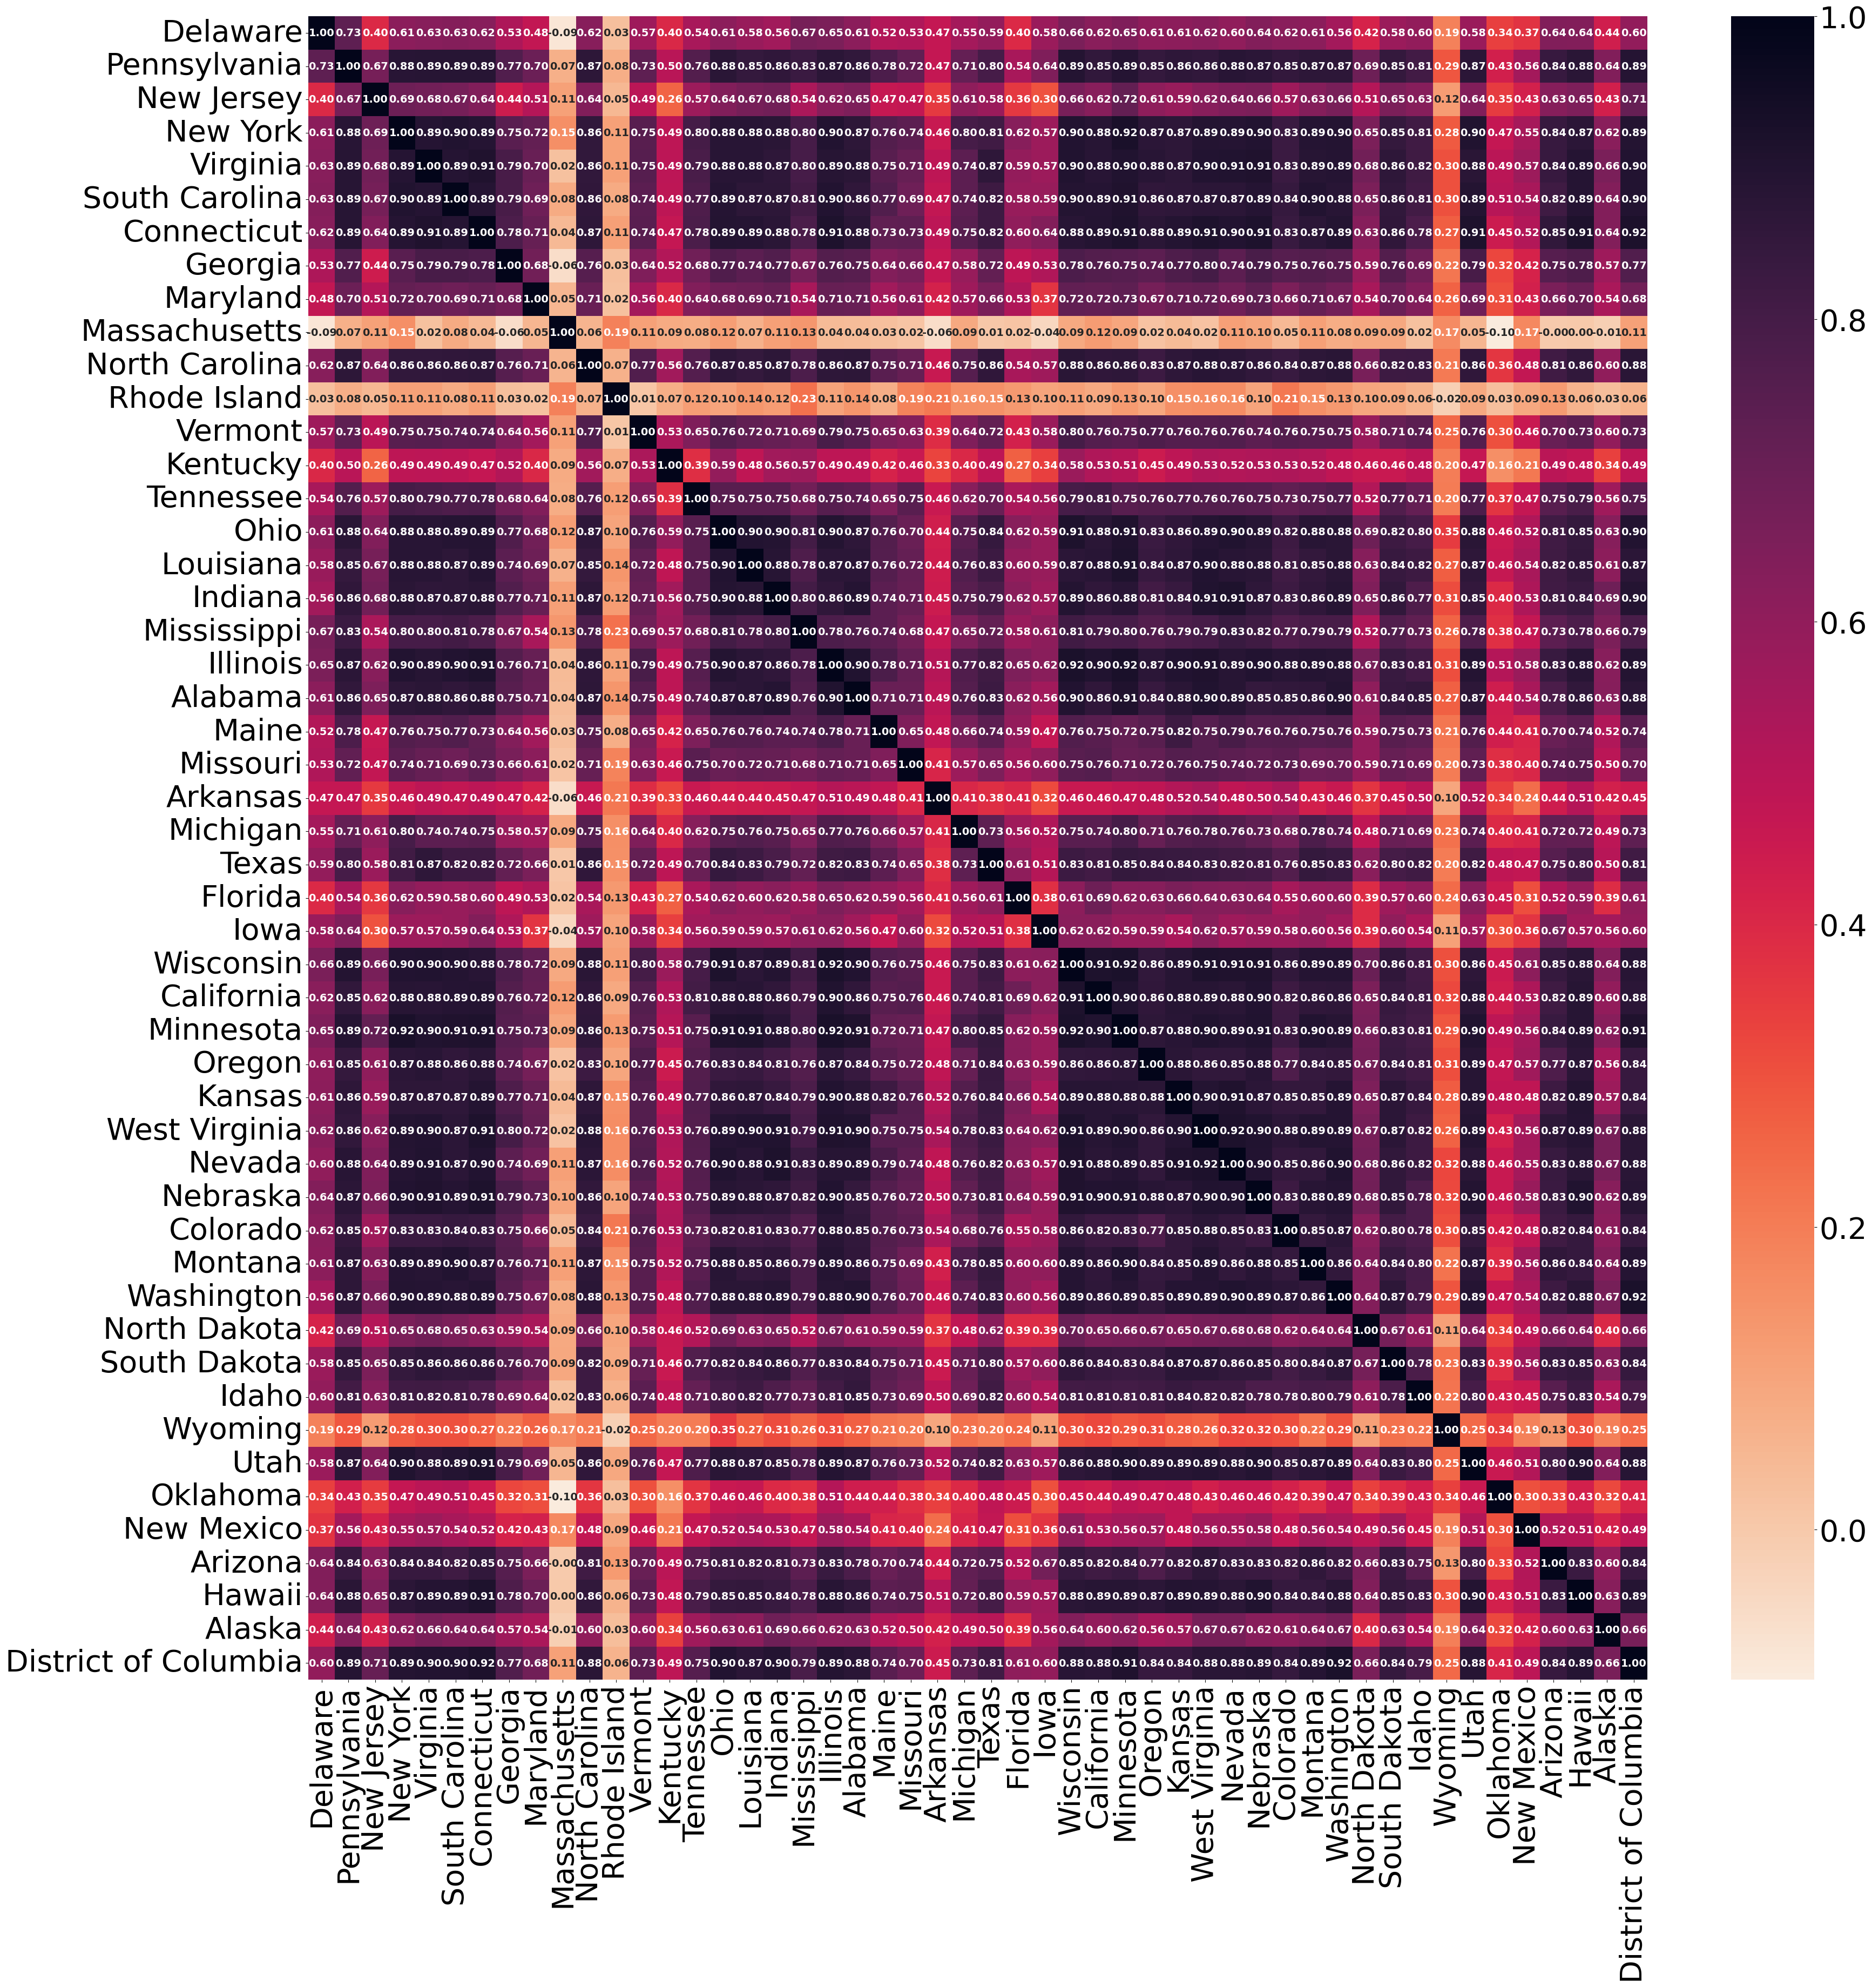

In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

statehood_order = {
    'Delaware': 1787,
    'Pennsylvania': 1787,
    'New Jersey': 1787,
    'Georgia': 1788,
    'Connecticut': 1788,
    'Massachusetts': 1788,
    'Maryland': 1788,
    'South Carolina': 1788,
    'New Hampshire': 1788,
    'Virginia': 1788,
    'New York': 1788,
    'North Carolina': 1789,
    'Rhode Island': 1790,
    'Vermont': 1791,
    'Kentucky': 1792,
    'Tennessee': 1796,
    'Ohio': 1803,
    'Louisiana': 1812,
    'Indiana': 1816,
    'Mississippi': 1817,
    'Illinois': 1818,
    'Alabama': 1819,
    'Maine': 1820,
    'Missouri': 1821,
    'Arkansas': 1836,
    'Michigan': 1837,
    'Florida': 1845,
    'Texas': 1845,
    'Iowa': 1846,
    'Wisconsin': 1848,
    'California': 1850,
    'Minnesota': 1858,
    'Oregon': 1859,
    'Kansas': 1861,
    'West Virginia': 1863,
    'Nevada': 1864,
    'Nebraska': 1867,
    'Colorado': 1876,
    'North Dakota': 1889,
    'South Dakota': 1889,
    'Montana': 1889,
    'Washington': 1889,
    'Idaho': 1890,
    'Wyoming': 1890,
    'Utah': 1896,
    'Oklahoma': 1907,
    'New Mexico': 1912,
    'Arizona': 1912,
    'Alaska': 1959,
    'Hawaii': 1959,
}

# Create a dataframe to store cosine similarity between state vectors
cosine_similarity_matrix = pd.DataFrame(np.zeros((len(state_name), len(state_name))), columns=state_name, index=state_name)

# Calculate cosine similarity between state vectors
for i in range(len(state_name)):
    for j in range(i, len(state_name)):
        cosine_sim = cosine_similarity([coolie_vector[i]], [coolie_vector[j]])[0][0]
        cosine_similarity_matrix.at[state_name[i], state_name[j]] = cosine_sim
        cosine_similarity_matrix.at[state_name[j], state_name[i]] = cosine_sim  # Fill both sides of the matrix

# Sort states based on statehood order
state_name_sorted = sorted(state_name, key=lambda x: statehood_order.get(x, float('inf')))

# Reorder rows and columns of the cosine similarity matrix
cosine_similarity_matrix = cosine_similarity_matrix.reindex(index=state_name_sorted, columns=state_name_sorted)

# Create a heatmap
plt.figure(figsize=(40, 40))
ax = sns.heatmap(cosine_similarity_matrix, annot=True, cmap="rocket_r", annot_kws={"size": 14, "fontweight":"bold"}, fmt='.2f')
# plt.title("Cosine Similarity between States", fontsize=20)

# Increase x-axis and y-axis tick label font size
ax.set_xticklabels(ax.get_xticklabels(), fontsize=40)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=40)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=40)

plt.savefig('eacl2023_latex/figure/heatmap-token-200.pdf', bbox_inches='tight', dpi=200)
plt.savefig('eacl2023_latex/figure/heatmap-token-200.png', bbox_inches='tight')

plt.show()


In [16]:
sum(cosine_similarity_matrix.mean())/50

0.6459056810051202

In [17]:
cosine_similarity_matrix.mean().sort_values(ascending=True)

Massachusetts           0.077844
Rhode Island            0.122901
Wyoming                 0.254934
Oklahoma                0.398702
Arkansas                0.435419
Kentucky                0.448351
New Mexico              0.470284
Iowa                    0.519425
Florida                 0.532257
Delaware                0.544404
Alaska                  0.548334
New Jersey              0.550247
North Dakota            0.569404
Maryland                0.603771
Missouri                0.633826
Michigan                0.642634
Vermont                 0.648491
Maine                   0.652018
Georgia                 0.653447
Tennessee               0.661695
Mississippi             0.689890
Idaho                   0.696957
Texas                   0.703411
Arizona                 0.710634
Colorado                0.724784
South Dakota            0.728264
Oregon                  0.733352
North Carolina          0.737006
Louisiana               0.744546
Alabama                 0.744732
Hawaii    

In [18]:
model=Word2Vec([row for row in df[df['state_str']=='Illinois']['ocr_lemma']])
model.wv.most_similar('coolie', topn=20)

[('chinese', 0.9998288154602051),
 ('labor', 0.9998008608818054),
 ('one', 0.9997989535331726),
 ('tbe', 0.9997909069061279),
 ('tho', 0.9997817873954773),
 ('china', 0.9997752904891968),
 ('two', 0.999767005443573),
 ('pay', 0.9997596144676208),
 ('carry', 0.9997490644454956),
 ('new', 0.9997419714927673),
 ('man', 0.9997376203536987),
 ('importation', 0.9997364282608032),
 ('upon', 0.9997345805168152),
 ('j', 0.9997325539588928),
 ('ship', 0.999731719493866),
 ('would', 0.9997279644012451),
 ('japanese', 0.9997279644012451),
 ('say', 0.9997257590293884),
 ('see', 0.9997209310531616),
 ('system', 0.9997164607048035)]

In [19]:
model=Word2Vec([row for row in df[df['state_str']=='California']['ocr_lemma']])
model.wv.most_similar('coolie', topn=20)

[('would', 0.9994150400161743),
 ('american', 0.9994032979011536),
 ('j', 0.9993927478790283),
 ('country', 0.9993858933448792),
 ('officer', 0.9993855357170105),
 ('upon', 0.9993840456008911),
 ('california', 0.9993823170661926),
 ('give', 0.9993765950202942),
 ('new', 0.9993720650672913),
 ('japan', 0.9993702173233032),
 ('government', 0.9993642568588257),
 ('employ', 0.9993563294410706),
 ('must', 0.9993562698364258),
 ('slave', 0.9993489384651184),
 ('laborer', 0.9993401765823364),
 ('leave', 0.9993396997451782),
 ('board', 0.9993381500244141),
 ('year', 0.9993318915367126),
 ('bring', 0.9993310570716858),
 ('traffic', 0.9993296265602112)]

In [20]:
model=Word2Vec([row for row in df[df['state_str']=='Wisconsin']['ocr_lemma']])
model.wv.most_similar('coolie', topn=20)

[('chinese', 0.9998397827148438),
 ('labor', 0.9998158812522888),
 ('japanese', 0.99979567527771),
 ('carry', 0.9997903108596802),
 ('work', 0.9997765421867371),
 ('one', 0.9997763633728027),
 ('two', 0.9997676014900208),
 ('time', 0.9997641444206238),
 ('take', 0.9997588992118835),
 ('would', 0.9997512698173523),
 ('day', 0.9997425675392151),
 ('kill', 0.9997345209121704),
 ('go', 0.9997344613075256),
 ('government', 0.9997273087501526),
 ('man', 0.9997249245643616),
 ('get', 0.9997198581695557),
 ('number', 0.9997111558914185),
 ('use', 0.999709963798523),
 ('come', 0.9997082948684692),
 ('importation', 0.9997079968452454)]

In [21]:
model=Word2Vec([row for row in df[df['state_str']=='Virginia']['ocr_lemma']])
model.wv.most_similar('coolie', topn=20)

[('chinese', 0.9998226761817932),
 ('trade', 0.9997968077659607),
 ('tho', 0.9997704029083252),
 ('man', 0.9997603893280029),
 ('japanese', 0.9997559189796448),
 ('j', 0.9997559189796448),
 ('make', 0.9997528791427612),
 ('one', 0.9997469782829285),
 ('three', 0.9997403025627136),
 ('labor', 0.9997395277023315),
 ('work', 0.9997243285179138),
 ('number', 0.9997227191925049),
 ('two', 0.9997187256813049),
 ('upon', 0.9996919631958008),
 ('importation', 0.9996880888938904),
 ('thousand', 0.9996855854988098),
 ('board', 0.999681293964386),
 ('british', 0.9996798038482666),
 ('ship', 0.9996662735939026),
 ('indian', 0.9996643662452698)]

In [22]:
model=Word2Vec([row for row in df[df['state_str']=='Nevada']['ocr_lemma']])
model.wv.most_similar('coolie', topn=20)

[('chinese', 0.9997900724411011),
 ('labor', 0.9997650980949402),
 ('club', 0.9997533559799194),
 ('trade', 0.9997342824935913),
 ('one', 0.9997289180755615),
 ('make', 0.9997277855873108),
 ('say', 0.9997175335884094),
 ('importation', 0.9997016787528992),
 ('tho', 0.999695360660553),
 ('immigration', 0.999681830406189),
 ('day', 0.9996774792671204),
 ('laborer', 0.9996716380119324),
 ('take', 0.9996647238731384),
 ('man', 0.9996456503868103),
 ('upon', 0.9996454119682312),
 ('meeting', 0.9996389150619507),
 ('anti', 0.9996373653411865),
 ('use', 0.9996225237846375),
 ('bring', 0.999618411064148),
 ('tbe', 0.9996173977851868)]

In [23]:
model=Word2Vec([row for row in df[df['state_str']=='Massachusetts']['ocr_lemma']])
model.wv.most_similar('coolie', topn=20)

[('among', 0.3579306900501251),
 ('call', 0.320150762796402),
 ('know', 0.28324902057647705),
 ('prohibit', 0.22956162691116333),
 ('time', 0.22324790060520172),
 ('report', 0.2221551537513733),
 ('get', 0.22096000611782074),
 ('arrive', 0.21760426461696625),
 ('come', 0.21312673389911652),
 ('oi', 0.21244367957115173),
 ('two', 0.21043187379837036),
 ('purpose', 0.20890405774116516),
 ('citizen', 0.19810689985752106),
 ('upon', 0.1918327361345291),
 ('kill', 0.18278968334197998),
 ('lor', 0.17347459495067596),
 ('labor', 0.17139582335948944),
 ('trade', 0.17032934725284576),
 ('cause', 0.16979221999645233),
 ('bill', 0.16895966231822968)]

In [24]:
model=Word2Vec([row for row in df[df['state_str']=='Rhode Island']['ocr_lemma']])
model.wv.most_similar('coolie', topn=20)

[('order', 0.41161084175109863),
 ('india', 0.3972286283969879),
 ('woman', 0.39220380783081055),
 ('great', 0.38906022906303406),
 ('take', 0.3761436939239502),
 ('ship', 0.3745693266391754),
 ('law', 0.34328827261924744),
 ('united', 0.32602033019065857),
 ('carry', 0.32340213656425476),
 ('many', 0.3122040331363678),
 ('march', 0.31144455075263977),
 ('japanese', 0.3062393367290497),
 ('low', 0.2791614830493927),
 ('class', 0.2759714126586914),
 ('labor', 0.27532219886779785),
 ('government', 0.273602694272995),
 ('chinese', 0.2615925669670105),
 ('number', 0.2571668028831482),
 ('make', 0.2515313923358917),
 ('well', 0.24944786727428436)]

In [25]:
model=Word2Vec([row for row in df[df['state_str']=='Wyoming']['ocr_lemma']])
model.wv.most_similar('coolie', topn=20)

[('chinese', 0.9969983696937561),
 ('labor', 0.9969146251678467),
 ('would', 0.9956086277961731),
 ('tho', 0.9955198168754578),
 ('japanese', 0.995290994644165),
 ('six', 0.9949948787689209),
 ('one', 0.9949327111244202),
 ('bring', 0.9948484301567078),
 ('say', 0.9946306943893433),
 ('work', 0.9945046305656433),
 ('two', 0.9941924214363098),
 ('man', 0.9940387010574341),
 ('united', 0.9940163493156433),
 ('first', 0.9938615560531616),
 ('line', 0.9938551783561707),
 ('large', 0.9938528537750244),
 ('class', 0.9938173294067383),
 ('contract', 0.9936970472335815),
 ('four', 0.993547797203064),
 ('three', 0.9934410452842712)]

In [26]:
model=Word2Vec([row for row in df[df['state_str']=='Oklahoma']['ocr_lemma']])
model.wv.most_similar('coolie', topn=20)

[('tho', 0.9912024140357971),
 ('chinese', 0.9821562170982361),
 ('shoulder', 0.9815341234207153),
 ('nnd', 0.978587806224823),
 ('japanese', 0.9776393175125122),
 ('pay', 0.9748073816299438),
 ('also', 0.9725086092948914),
 ('labor', 0.9706595540046692),
 ('n', 0.9642314314842224),
 ('carry', 0.963234543800354),
 ('home', 0.9632335901260376),
 ('get', 0.9630137085914612),
 ('work', 0.9612358808517456),
 ('part', 0.9609916806221008),
 ('may', 0.9600076675415039),
 ('give', 0.9599143862724304),
 ('man', 0.9595016241073608),
 ('still', 0.9568862915039062),
 ('line', 0.9558747410774231),
 ('call', 0.9556798338890076)]

In [27]:
model=Word2Vec([row for row in df[df['state_str']=='Arkansas']['ocr_lemma']])
model.wv.most_similar('coolie', topn=20)

[('labor', 0.99853515625),
 ('chinese', 0.9984747171401978),
 ('j', 0.9982942938804626),
 ('I', 0.9980053901672363),
 ('mongolian', 0.9979101419448853),
 ('one', 0.9978631734848022),
 ('thousand', 0.9977688789367676),
 ('japanese', 0.9975269436836243),
 ('tolerate', 0.9975242018699646),
 ('revival', 0.9974641799926758),
 ('may', 0.9974541664123535),
 ('carry', 0.9974355101585388),
 ('sometimes', 0.9973258376121521),
 ('m', 0.9972622990608215),
 ('step', 0.9971907138824463),
 ('trade', 0.997154712677002),
 ('say', 0.9971134662628174),
 ('six', 0.997098982334137),
 ('german', 0.9970568418502808),
 ('work', 0.9970484375953674)]